In [1]:
"""初始化django环境
"""
import os
from django.core.wsgi import get_wsgi_application

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "QinggangManageSys.settings")

'初始化django环境\n'

'QinggangManageSys.settings'

In [19]:
def _reload():
    from data_import  import models
    from django.db import transaction
    from QinggangManageSys import settings
    imp.reload(settings)
    imp.reload(models)
# _reload()

from data_import  import models
from django.db import transaction
from QinggangManageSys import settings
# imp.reload(settings)
imp.reload(models)

/Users/changxin/mission/qinggang/venv/lib/python3.5/site-packages/django/db/models/base.py:309: RuntimeWarning: Model 'contentpost.data_import' was already registered. Reloading models is not advised as it can lead to inconsistencies, most notably with related models.
  new_class._meta.apps.register_model(new_class._meta.app_label, new_class)
/Users/changxin/mission/qinggang/venv/lib/python3.5/site-packages/django/db/models/base.py:309: RuntimeWarning: Model 'contentpostimage.data_import' was already registered. Reloading models is not advised as it can lead to inconsistencies, most notably with related models.
  new_class._meta.apps.register_model(new_class._meta.app_label, new_class)
/Users/changxin/mission/qinggang/venv/lib/python3.5/site-packages/django/db/models/base.py:309: RuntimeWarning: Model 'transrelation.data_import' was already registered. Reloading models is not advised as it can lead to inconsistencies, most notably with related models.
  new_class._meta.apps.register_mo

<module 'data_import.models' from '/Users/changxin/mission/qinggang/QinggangManageSys/data_import/models.py'>

In [3]:
def transaction_decorator(f):
    bsm = models.BaseManage()
    try:
        with transaction.atomic():
            f(bsm)
    except Exception as e:
        print("transaction error！")
        print('ERROR:[', e, ']')

In [37]:
imp.reload(models)

/Users/changxin/mission/qinggang/venv/lib/python3.5/site-packages/django/db/models/base.py:309: RuntimeWarning: Model 'contentpost.data_import' was already registered. Reloading models is not advised as it can lead to inconsistencies, most notably with related models.
  new_class._meta.apps.register_model(new_class._meta.app_label, new_class)
/Users/changxin/mission/qinggang/venv/lib/python3.5/site-packages/django/db/models/base.py:309: RuntimeWarning: Model 'contentpostimage.data_import' was already registered. Reloading models is not advised as it can lead to inconsistencies, most notably with related models.
  new_class._meta.apps.register_model(new_class._meta.app_label, new_class)
/Users/changxin/mission/qinggang/venv/lib/python3.5/site-packages/django/db/models/base.py:309: RuntimeWarning: Model 'transrelation.data_import' was already registered. Reloading models is not advised as it can lead to inconsistencies, most notably with related models.
  new_class._meta.apps.register_mo

<module 'data_import.models' from '/Users/changxin/mission/qinggang/QinggangManageSys/data_import/models.py'>

In [38]:

def test_transaction_decorator():
    sqlVO = {}
    sql = "INSERT INTO person VALUES('%s', '%s', '%s')"
    persons = [(24, 'ccx', 'basketball'), (21, 'ccx', 'basketball'), ('23', 'cx', 'travle')]
    bsm = models.BaseManage()
    @models.transaction_decorator
    def inner_exe(bsm):
        """业务具体的执行逻辑
        Args:
            bsm: BaseManage实例对象，已经初始化数据库连接
        Returns:
            None
        """
        for p in persons:
            sqlVO['sql'] = sql % p
            print('SQL [%s]' % sqlVO.get('sql'))
            bsm.execute_single(sqlVO)

    inner_exe(bsm)

In [39]:
test_transaction_decorator()

SQL [INSERT INTO person VALUES('24', 'ccx', 'basketball')]
Failed to execute SQL[INSERT INTO person VALUES('24', 'ccx', 'basketball')]

transaction error！
ERROR:[ (1062, "Duplicate entry '24' for key 'PRIMARY'") ]


In [40]:
# 只在条件选择时存在，其他数据就丢弃了
def data_pre_process(df):
	# tradeno因空格差异导致不同

	df['tradeno'] = df['tradeno'].replace('60Si2Mn（线）', '65Si2Mn(线)')
	df['tradeno'] = df['tradeno'].replace('65Si2Mn(线）', '65Si2Mn(线)')
	# region异常字段
	df['region'] = df['region'].replace('（17：40）全国', '全国')
	df['region'] = df['region'].replace('(15:24)全国', '全国')
	# 根据时间去除之前牌号未正常记录的数据
	df['updatetime'] = df['updatetime'].map(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d'))
	df = df[df['updatetime'] > datetime.datetime.strptime('2010-06-03', '%Y-%m-%d')]

	return df

# 获取steelprice每一列选择的可选项
def get_all_history_select(df):
	df = data_pre_process(df)
	extra_col = ('id', 'price', 'updown', 'trademark', 'updatetime', 'remark')
	choose_col = ('steeltype', 'tradeno', 'delivery', 'specification', 'factory', 'region')
	all_select = dict()
	for col in df.columns:
		if col in extra_col:
			print(col)
			continue
		all_select[col] = list(df[col].unique())
	return all_select,choose_col

In [41]:
'''
价格预测数据合并
'''
import datetime
import imp

import pandas as pd


from data_import.PricePredict import data_cleaning


imp.reload(data_cleaning) # 重新载入模块

table_names = data_cleaning.get_table_name()
table_names
table_name_meanings = data_cleaning.get_table_meanings()
# tiejingfen 不存在
table_names.remove("tiejingfen")

'\n价格预测数据合并\n'

<module 'data_import.PricePredict.data_cleaning' from '/Users/changxin/mission/qinggang/QinggangManageSys/data_import/PricePredict/data_cleaning.py'>

['tkszs', 'meiyuan', 'steelprice', 'meitan_ljm', 'jkk_qingdao', 'gtcl']

ValueError: list.remove(x): x not in list

In [42]:
table_names

['tkszs', 'meiyuan', 'steelprice', 'meitan_ljm', 'jkk_qingdao', 'gtcl']

In [43]:
"""
生成steelprice的测试数据
"""
def steelprice_custom(bsm):
    sqlVO = dict()
    sqlVO['sql'] = 'SELECT * FROM steelprice where region=%s and factory=%s and delivery=%s and steeltype=%s\
        and tradeno=%s and specification=%s  and updatetime >= %s and updatetime <= %s'
    history_begin = "2010-06-03"
    history_end = "2017-10-14"
    params = ['全国', '鞍钢', '热轧', '弹簧钢', '65Mn', 'Φ6.5-25']
    params.append(datetime.datetime.strptime(history_begin, '%Y-%m-%d'))
    params.append(datetime.datetime.strptime(history_end, '%Y-%m-%d'))
    sqlVO['vars'] = params
    desc = bsm.direct_get_description(sqlVO)
    rs = bsm.select_single(sqlVO)
    return desc, rs

dfs = dict()
sqlVO = dict()
bsm = models.BaseManage()
@models.transaction_decorator
def inner_exe(bsm):
    for tname in table_names:
        if tname == 'steelprice':
            desc, rs = steelprice_custom(bsm)
            print(desc)
        else:
            sqlVO['sql'] = 'SELECT * FROM {0}'.format(tname)
            desc = bsm.direct_get_description(sqlVO)
            rs = bsm.select_single(sqlVO) # 必须是字典类型，否则无法匹配dataframe列名
        if rs:
            # print(rs[:2])
            try:
                df = pd.DataFrame(rs,columns=pd.Series(desc[0]))
                # exceler.save_csv_pd(df,tname,table_name_means)
                dfs[tname] = df # 'fgzs'暂时无数据
            except Exception as e:
                print('ERROR:[', e, ']')

inner_exe(bsm)

'\n生成steelprice的测试数据\n'

['tkszs_date', 'tkszs_zh', 'tkszs_jkk', 'tkszs_gck', 'tkszs_qdg']


['meiyuan_id', 'meiyuan_date', 'meiyuan_zhishu']


/Users/changxin/mission/qinggang/venv/lib/python3.5/site-packages/django/db/backends/mysql/base.py:72: RuntimeWarning: MySQL received a naive datetime (2010-06-03 00:00:00) while time zone support is active.
  RuntimeWarning)
/Users/changxin/mission/qinggang/venv/lib/python3.5/site-packages/django/db/backends/mysql/base.py:72: RuntimeWarning: MySQL received a naive datetime (2017-10-14 00:00:00) while time zone support is active.
  RuntimeWarning)


['id', 'steeltype', 'tradeno', 'delivery', 'specification', 'factory', 'price', 'updown', 'region', 'trademark', 'updatetime', 'remark']
[['id', 'steeltype', 'tradeno', 'delivery', 'specification', 'factory', 'price', 'updown', 'region', 'trademark', 'updatetime', 'remark'], {'factory': 'VAR_STRING', 'updatetime': 'DATE', 'id': 'LONG', 'region': 'VAR_STRING', 'specification': 'VAR_STRING', 'delivery': 'VAR_STRING', 'tradeno': 'VAR_STRING', 'price': 'VAR_STRING', 'remark': 'VAR_STRING', 'steeltype': 'VAR_STRING', 'trademark': 'LONG', 'updown': 'VAR_STRING'}]


['coal_ljm_id', 'coal_ljm_date', 'coal_ljm_pinming', 'coal_ljm_guige', 'coal_ljm_chandi', 'coal_ljm_jiage', 'coal_ljm_jiageshuxing', 'coal_ljm_shui']


['jkk_id', 'jkk_date', 'jkk_name', 'jkk_pinwei', 'jkk_chandi', 'jkk_jizhunjia', 'jkk_chebanjia', 'jkk_leijizhangting', 'jkk_gongyingliang']
['gangtie_id', 'gangtie_date', 'gangtie_shengtie', 'gangtie_gangcai', 'gangtie_cugang']


In [44]:
dfs.keys()
table_names

dict_keys(['tkszs', 'gtcl', 'meitan_ljm', 'meiyuan', 'jkk_qingdao', 'steelprice'])

['tkszs', 'meiyuan', 'steelprice', 'meitan_ljm', 'jkk_qingdao', 'gtcl']

In [45]:
bsm = models.BaseManage()
sqlVO = dict()
sqlVO['sql'] = 'SELECT * FROM {0}'.format('steelprice')
desc = bsm.direct_get_description(sqlVO)
rs = bsm.select_single(sqlVO)

['id', 'steeltype', 'tradeno', 'delivery', 'specification', 'factory', 'price', 'updown', 'region', 'trademark', 'updatetime', 'remark']


In [46]:
pricedf = dfs['steelprice']
# 以钢材价格的时间周期取值
begin = pricedf['updatetime'].min()
end = pricedf['updatetime'].max()
model = pd.DataFrame()
for col in dfs.keys():
    model[col] = pd.Series()
model['time'] = pd.Series()

model['time'] = pricedf['updatetime']

In [47]:
for ele in table_names:
    if ele not in dfs:
        table_names.remove(ele)
table_names

['tkszs', 'meiyuan', 'steelprice', 'meitan_ljm', 'jkk_qingdao', 'gtcl']

In [48]:
i = 0
time_fields = {
    'tkszs':'tkszs_date',
    'meiyuan':'meiyuan_date',
    'steelprice':'updatetime',
    'meitan_ljm':'coal_ljm_date',
    'jkk_qingdao':'jkk_date',
    'fgzs':'fgzs_date',
    'gtcl':'gangtie_date',
}
price_field = {
    'tkszs':'tkszs_qdg',
    'meiyuan':'meiyuan_zhishu',
    'steelprice':'price',
    'meitan_ljm':'coal_ljm_jiage',
    'jkk_qingdao':'jkk_jizhunjia',
    'fgzs':'fgzs_zhi',
    'gtcl':'gangtie_gangcai',
}
for row in model.index:
    cur_time = model.ix[row, 'time']
    for tname in table_names:
        eledf = dfs[tname]
        try:
            value = eledf[eledf[time_fields.get(tname, None)] == cur_time]
            # model.ix[row, tname] = value[price_field.get(tname, None)]
        except Exception as e:
            print('ERROR:[', e, ']')
        if len(value) > 0:
            try:
                price = value[price_field.get(tname, None)]
                model.ix[row, tname] = list(price)[0]
            except Exception as e:
                print('ERROR:[', e, ']')
            if i % 50 == 0:
                print(list(price)[0])
            i = i + 1
print(i)

70.3
610
460


620
590


550
45.3


645
3997


4532
4532
95.97


4532
1330
645


1330
96.94
87.2


4582
74.3
101.16 


58.5
4984


4984
1179


In [49]:
model.to_csv('model.csv', encoding = 'utf-8')

In [50]:
def dfs_preproccess(model):
    model_fill = model.fillna(method='ffill')
    model_fill = model_fill.fillna(method='bfill')
    def extra_unexcepted_symbol(x):
        if str(x).find('-') > -1:
            nums = str(x).split('-')
            print(len(nums))
            for i in range(len(nums)):    
                print(nums[i])
                if not nums[i]:
                    nums[i]=0      
            return (float(nums[0]) + float(nums[1]))/2
        else:
            return x
    for col in model_fill.columns:
        try:
            if col == 'fgzs':
                model_fill[col] = model_fill[col].map(lambda x : x.replace(',',''))
            if col != 'time':
                model_fill[col] = model_fill[col].map(lambda x : extra_unexcepted_symbol(x))
                model_fill[col] = model_fill[col].map(lambda x : float(x))
        except Exception as e:
            print("ERROR:[", e, ']')
    return model_fill

In [51]:
model_fill = dfs_preproccess(model)
model_fill.to_csv('model_fill.csv', encoding = 'utf-8')
for col in model_fill:
    model_fill[col].dtype

2
570
580


dtype('float64')

dtype('float64')

dtype('float64')

dtype('float64')

dtype('float64')

dtype('float64')

dtype('O')

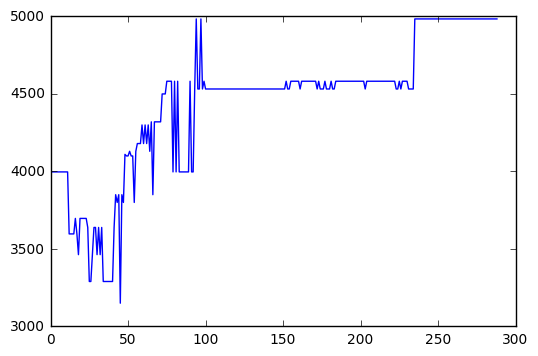

In [52]:
import matplotlib.pyplot as plt
steel_price = model_fill['steelprice']
plt.plot(steel_price)
plt.show()

In [53]:
from sklearn import preprocessing
cols = model_fill.columns
cols = cols[0:-1]
model_fill_scaler_notime = model_fill[cols]
model_fill_scaler = preprocessing.scale(model_fill_scaler_notime) # ('numpy.ndarray')
model_fill_scaler_tr = pd.DataFrame(model_fill_scaler, columns=cols)

In [54]:
model_fill_scaler_tr

,tkszs,gtcl,meitan_ljm,meiyuan,jkk_qingdao,steelprice
0,0.359299,1.060032,0.528132,0.778106,0.606695,-1.006683
1,0.359299,1.060032,0.528132,1.008197,0.606695,-1.006683
2,0.479076,1.060032,0.528132,1.216813,0.561321,-1.006683
3,0.543571,1.060032,0.528132,1.035808,0.697443,-1.006683
4,0.359299,1.060032,0.528132,1.219881,0.606695,-1.006683
5,0.359299,1.060032,0.528132,1.164659,0.742817,-1.006683
6,0.294804,1.060032,0.183810,1.081826,0.606695,-1.006683
7,0.230309,1.060032,0.183810,1.284306,0.515946,-1.006683
8,0.110532,1.060032,0.183810,1.284306,0.425198,-1.006683
9,-0.138236,1.060032,0.183810,1.084894,0.334450,-1.006683
